# 原始交易数据 VS 附加指标

## 测试环境

* Intel Core i5-6500 3.2-GHz
* 8.00GB

## 测试内容

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from LSTM_for_Stock.data_processor import Wrapper_default
from LSTM_for_Stock.data_processor import Normalize
from LSTM_for_Stock.data_processor import Wrapper_append_features
from LSTM_for_Stock.data_processor import Normalize_append_features
import jupyter_helper
from keras.backend import clear_session
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
report={}
report['kind']=[]
report['acc']=[]
window=5
days=1

### 原始交易数据

In [3]:
h = jupyter_helper.do(
    window=window,
    days=days,
    wrapper=Wrapper_default(),
    norm=Normalize())

QUANTAXIS>> From C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
QUANTAXIS>> From C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\tensorflow\python\ops\math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 128)            72192     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 122,657
Trainable params: 122,657
Non-trainable params: 0
_________________________________________________________________


Net time using :  13.414639472961426  secs.
473/473 [==============================] - ETA:  - 0s 120us/step
Score:
loss:0.05347410444540403
mean_absolute_error:0.04392250253962664
acc:0.0021141649048625794


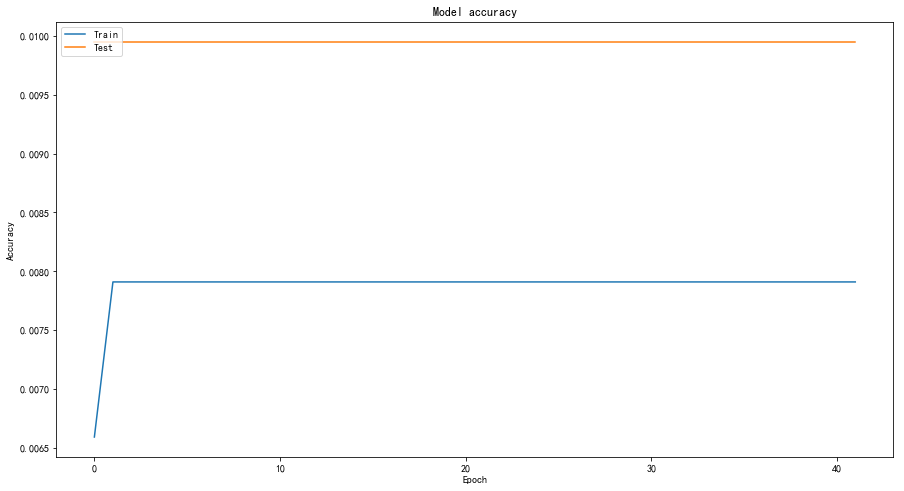

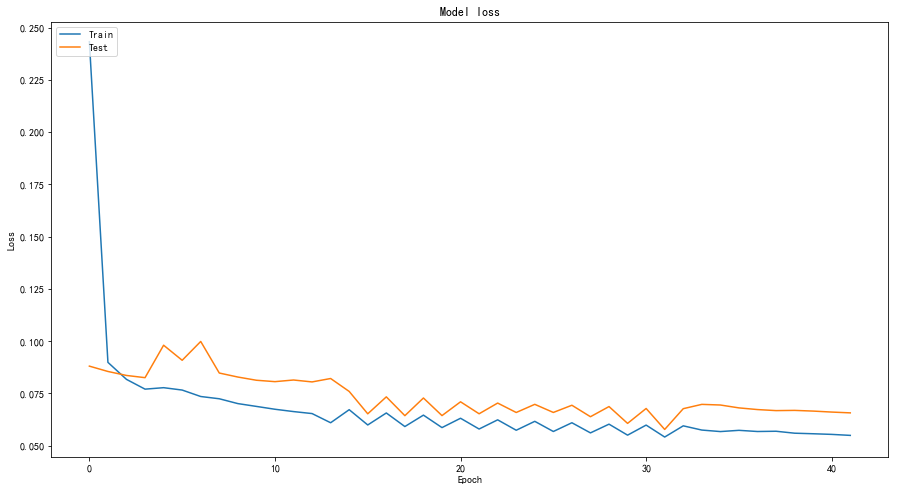

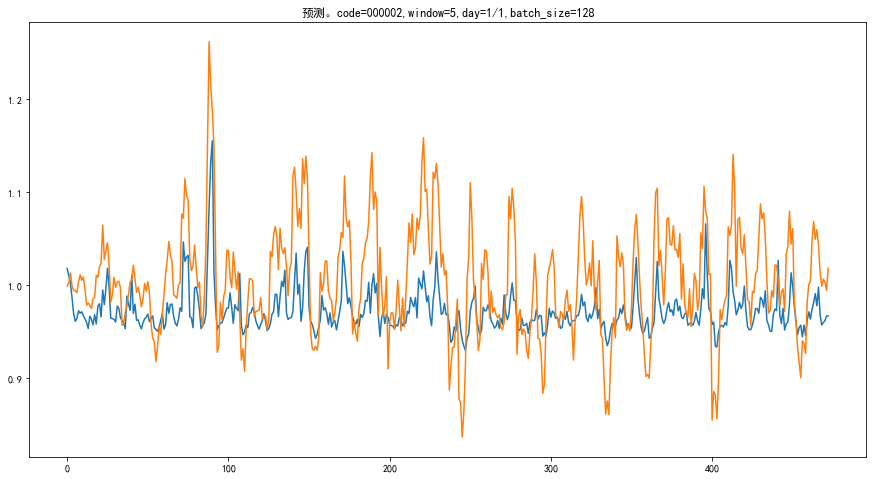

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


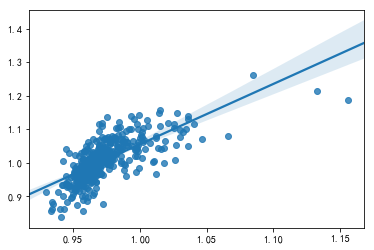

Slope Day1:1.8064518280130222


In [4]:
s=jupyter_helper.show_history(h)

In [5]:
report['kind'].append('原始指标')
# report['batch_size'].append(h['batch_size'])
# report['window'].append(h['window'])
# report['time(secs)'].append(h['end']-h['start'])
# report['time/step(us)'].append('5')
# report['loss'].append(s['score'][0])
# report['mean_absolute_error'].append(s['score'][1])
report['acc'].append(s['score'][2])
# report['slope'].append(s['slope'][0])

#### 准确率

In [6]:
s['score'][2]

0.0021141649048625794

In [7]:
clear_session()

### 移除指数交易数据

In [8]:
h = jupyter_helper.do(
    window=window,
    days=days,
    wrapper=Wrapper_default(),
    norm=Normalize())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 128)            72192     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 122,657
Trainable params: 122,657
Non-trainable params: 0
_________________________________________________________________


Net time using :  45.05896806716919  secs.
473/473 [==============================] - ETA:  - 0s 118us/step
Score:
loss:0.035314348583399116
mean_absolute_error:0.02907027668431874
acc:0.0021141649048625794


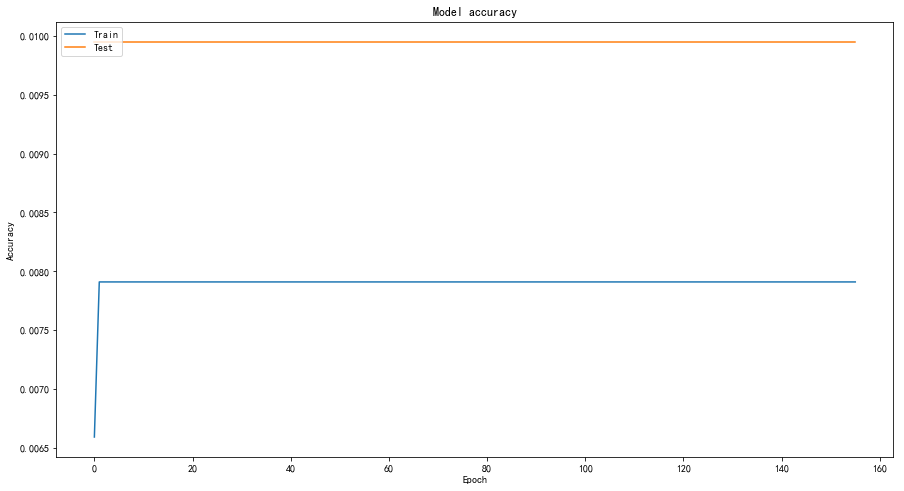

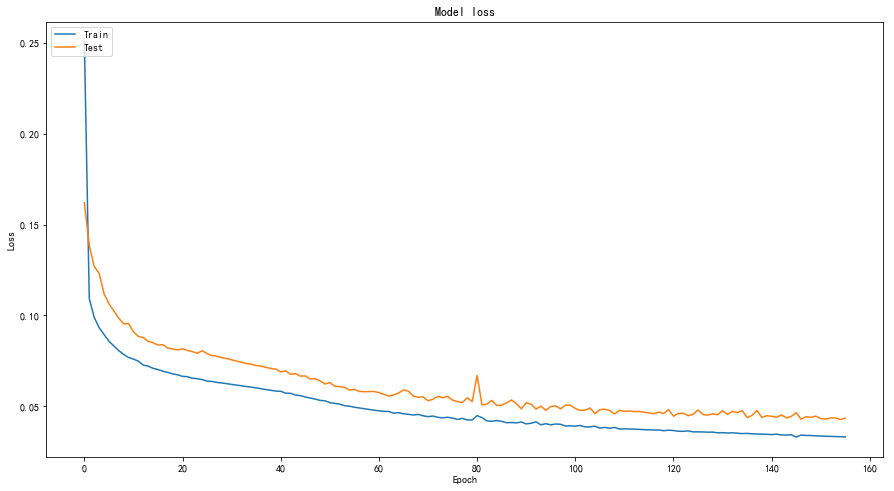

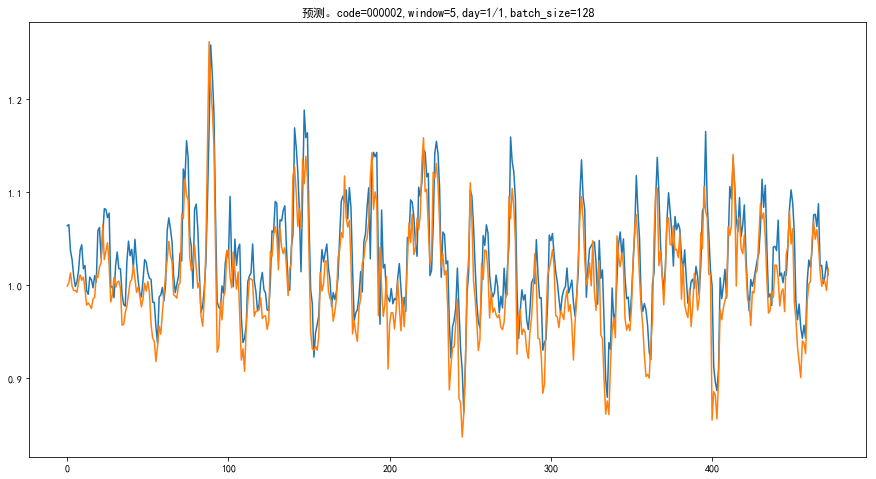

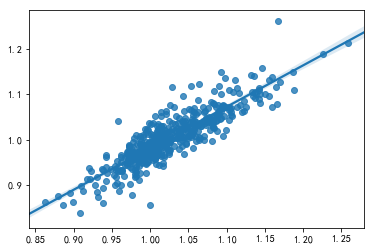

Slope Day1:0.9170206742424414


In [9]:
s=jupyter_helper.show_history(h)

In [10]:
report['kind'].append('移除指数交易数据')
# report['batch_size'].append(h['batch_size'])
# report['window'].append(h['window'])
# report['time(secs)'].append(h['end']-h['start'])
# report['time/step(us)'].append('5')
# report['loss'].append(s['score'][0])
# report['mean_absolute_error'].append(s['score'][1])
report['acc'].append(s['score'][2])
# report['slope'].append(s['slope'][0])

#### 准确率

In [11]:
s['score'][2]

0.0021141649048625794

In [12]:
clear_session()

### 附加其他股票交易数据

In [13]:
h = jupyter_helper.do(
    window=window,
    days=days,
    wrapper=Wrapper_default(),
    norm=Normalize(),
    appends=['600606'#绿地控股
            ,'600383'#金地集团
            ,'600048'#保利地产
            ,'000024'#招商地产
            ,'000616'#海航投资
            ])

QA Error QA_fetch_stock_day_adv parameter code=000024 , start=2005-04-08, end=2019-04-12 call QA_fetch_stock_day return None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 128)            84480     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 134,945
Trainable params: 134,945
Non-trainable params: 0
_________________________________________________________________


Net time using :  81.28914022445679  secs.
430/430 [==============================] - ETA:  - 0s 107us/step
Score:
loss:0.042108221222148384
mean_absolute_error:0.033460256414011465
acc:0.002325581395348837


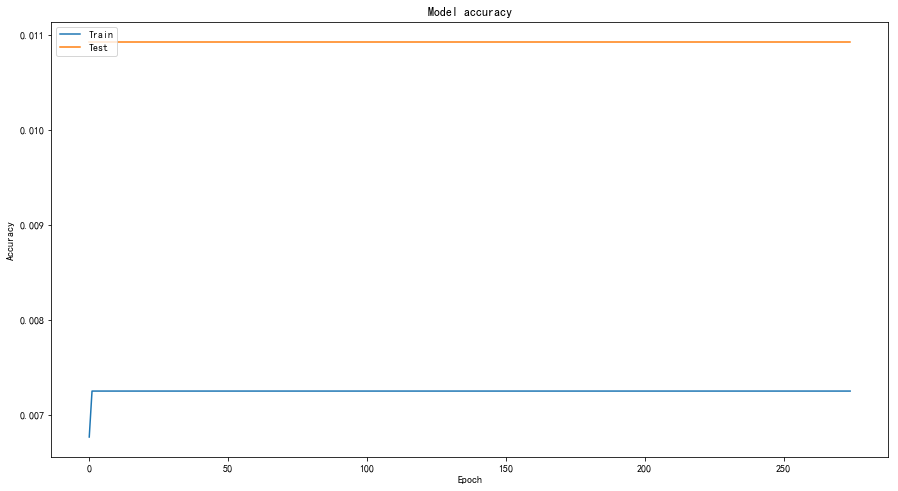

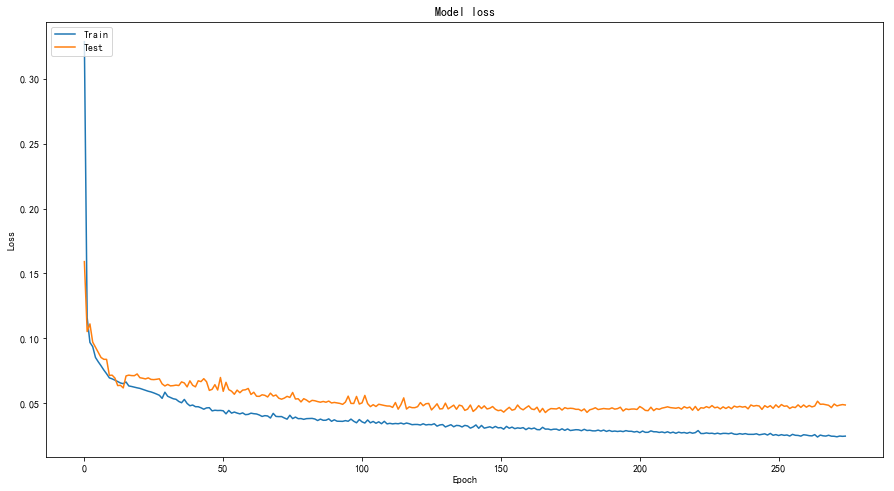

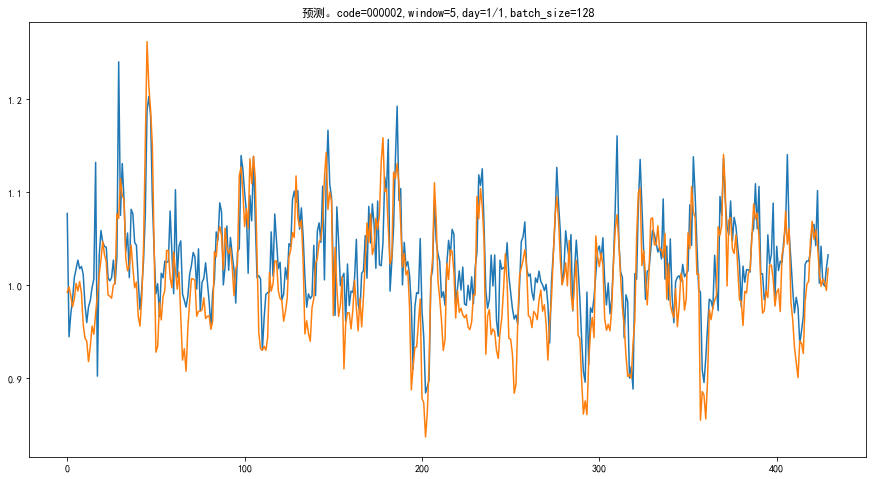

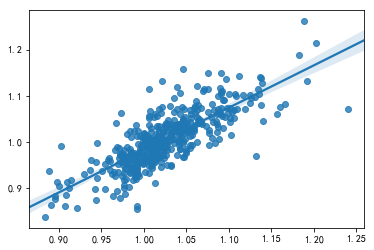

Slope Day1:0.9180905358312242


In [14]:
s=jupyter_helper.show_history(h)

In [15]:
report['kind'].append('附加其他股票交易数据')
# report['batch_size'].append(h['batch_size'])
# report['window'].append(h['window'])
# report['time(secs)'].append(h['end']-h['start'])
# report['time/step(us)'].append('5')
# report['loss'].append(s['score'][0])
# report['mean_absolute_error'].append(s['score'][1])
report['acc'].append(s['score'][2])
# report['slope'].append(s['slope'][0])

#### 准确率

In [16]:
s['score'][2]

0.002325581395348837

In [17]:
clear_session()

### 附加其他指标

In [18]:
# h = jupyter_helper.do(
#     window=window,
#     days=days,
#     wrapper=Wrapper_append_features(),
#     norm=Normalize_append_features())

In [19]:
# s=jupyter_helper.show_history(h)

In [20]:
# report['kind'].append('附加其他技术指标')
# # report['batch_size'].append(h['batch_size'])
# # report['window'].append(h['window'])
# # report['time(secs)'].append(h['end']-h['start'])
# # report['time/step(us)'].append('5')
# # report['loss'].append(s['score'][0])
# # report['mean_absolute_error'].append(s['score'][1])
# report['acc'].append(s['score'][2])
# # report['slope'].append(s['slope'][0])

#### 准确率

In [21]:
# s['score'][2]

## 报告

In [22]:
pd.DataFrame(report,columns=['kind','acc']).set_index('kind').sort_values('acc',ascending=False)

,acc
kind,
附加其他股票交易数据,0.002326
原始指标,0.002114
移除指数交易数据,0.002114
